In [1]:
import pandas as pd
import numpy as np

In [2]:
# Import attributes file.
attributes = pd.read_csv('/Users/davidlichacz/home-depot/attributes.csv')

In [3]:
# Explore attributes dataframe.
attributes.shape

(2044803, 3)

In [4]:
attributes.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2044803 entries, 0 to 2044802
Data columns (total 3 columns):
product_uid    2044648 non-null float64
name           2044648 non-null object
value          2042713 non-null object
dtypes: float64(1), object(2)
memory usage: 46.8+ MB


Question: Why did I need to include the null_counts argument to get the null information?  It was not needed for the dataframes below.

In [5]:
attributes.head()

,product_uid,name,value
0,100001.0,Bullet01,Versatile connector for various 90° connection...
1,100001.0,Bullet02,Stronger than angled nailing or screw fastenin...
2,100001.0,Bullet03,Help ensure joints are consistently straight a...
3,100001.0,Bullet04,Dimensions: 3 in. x 3 in. x 1-1/2 in.
4,100001.0,Bullet05,Made from 12-Gauge steel


In [6]:
attributes.tail()

,product_uid,name,value
2044798,224428.0,Pilot Bit Included,No
2044799,224428.0,Power Tool Product Type,Drill & Router Bits
2044800,224428.0,Shank Diameter,3/8 in
2044801,224428.0,Shank Style,Hex
2044802,224428.0,Tools Product Type,Power Tool


In [7]:
# There are 155 missing values in the product_uid & name columns and 2090 missing values in the value columns.
# Removing rows that are all null eliminates all the missing values for product_uid & name.

attributes = attributes.dropna(how='all')
attributes.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2044648 entries, 0 to 2044802
Data columns (total 3 columns):
product_uid    2044648 non-null float64
name           2044648 non-null object
value          2042713 non-null object
dtypes: float64(1), object(2)
memory usage: 62.4+ MB


In [8]:
# Looking at the missing values for the value column, it seems like the lack of information may be information in itself.
# for example, no battery size might mean no battery is required.
attributes[attributes['value'].isnull()].head(20)

,product_uid,name,value
1022,100044.0,Collection Name,NaN
1349,100058.0,Battery Size,NaN
5909,100248.0,Fastener Thread Type,NaN
6367,100266.0,Drive Style,NaN
8823,100372.0,Collection Name,NaN
9131,100386.0,Battery Type Required,NaN
9589,100403.0,Exact Dry SCOF Rating,NaN
9590,100403.0,Exact Wet SCOF Rating,NaN
9595,100403.0,Mosaic Sub Unit Length (in.),NaN
9596,100403.0,Mosaic Sub Unit Width (in.),NaN


In [9]:
# Replace NaN values with "None" for now.
attributes['value'] = attributes['value'].fillna('None')

In [10]:
# The product_uid column is read in as a float, but should really be a string.  The format for the id
# appears to be six numerical digits.  Check to see if this is true.
import re

pattern = re.compile('[0-9]{6}\.0$')
id_check = attributes['product_uid'].astype(str).apply(pattern.match)
id_check.astype(bool).all()

True

In [11]:
# Since all elements of the product_uid column are of the format 6 digits followed by a decimal point and a zero,
# we can convert to a string and trim the last two characters.
attributes['product_uid'] = attributes['product_uid'].astype(str).str[:-2]

In [12]:
attributes.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2044648 entries, 0 to 2044802
Data columns (total 3 columns):
product_uid    2044648 non-null object
name           2044648 non-null object
value          2044648 non-null object
dtypes: object(3)
memory usage: 62.4+ MB


In [13]:
attributes.head()

,product_uid,name,value
0,100001,Bullet01,Versatile connector for various 90° connection...
1,100001,Bullet02,Stronger than angled nailing or screw fastenin...
2,100001,Bullet03,Help ensure joints are consistently straight a...
3,100001,Bullet04,Dimensions: 3 in. x 3 in. x 1-1/2 in.
4,100001,Bullet05,Made from 12-Gauge steel


In [14]:
# Import descriptions file.
descriptions = pd.read_csv('/Users/davidlichacz/home-depot/product_descriptions.csv')

In [15]:
# Explore descriptions dataframe.
descriptions.shape

(124428, 2)

In [16]:
descriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124428 entries, 0 to 124427
Data columns (total 2 columns):
product_uid            124428 non-null int64
product_description    124428 non-null object
dtypes: int64(1), object(1)
memory usage: 1.9+ MB


In [17]:
descriptions.head()

,product_uid,product_description
0,100001,"Not only do angles make joints stronger, they ..."
1,100002,BEHR Premium Textured DECKOVER is an innovativ...
2,100003,Classic architecture meets contemporary design...
3,100004,The Grape Solar 265-Watt Polycrystalline PV So...
4,100005,Update your bathroom with the Delta Vero Singl...


In [18]:
# There are no null values in this dataframe.  This time the product_uid column imported as an integer so 
# we will perform a similar conversion as above.
pattern = re.compile('[0-9]{6}$')
id_check = descriptions['product_uid'].astype(str).apply(pattern.match)
id_check.astype(bool).all()

True

In [19]:
# All product_uid values are 6 digits, so convert to string.
descriptions['product_uid'] = descriptions['product_uid'].astype(str)

In [20]:
descriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124428 entries, 0 to 124427
Data columns (total 2 columns):
product_uid            124428 non-null object
product_description    124428 non-null object
dtypes: object(2)
memory usage: 1.9+ MB


In [21]:
# Import train file.
train = pd.read_csv('/Users/davidlichacz/home-depot/train.csv', encoding='latin-1')

In [22]:
# Explore train file.
train.shape

(74067, 5)

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74067 entries, 0 to 74066
Data columns (total 5 columns):
id               74067 non-null int64
product_uid      74067 non-null int64
product_title    74067 non-null object
search_term      74067 non-null object
relevance        74067 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 2.8+ MB


In [24]:
train.head()

,id,product_uid,product_title,search_term,relevance
0,2,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00
1,3,100001,Simpson Strong-Tie 12-Gauge Angle,l bracket,2.50
2,9,100002,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,deck over,3.00
3,16,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,rain shower head,2.33
4,17,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,shower only faucet,2.67


In [25]:
# There are no missing values in the train dataframe.  Like before the product_uid column needs to be 
# converted to a string.
pattern = re.compile('[0-9]{6}$')
id_check = train['product_uid'].astype(str).apply(pattern.match)
id_check.astype(bool).all()

True

In [26]:
train['product_uid'] = train['product_uid'].astype(str)

In [27]:
train.head()

,id,product_uid,product_title,search_term,relevance
0,2,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00
1,3,100001,Simpson Strong-Tie 12-Gauge Angle,l bracket,2.50
2,9,100002,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,deck over,3.00
3,16,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,rain shower head,2.33
4,17,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,shower only faucet,2.67


In [28]:
# The relevance scores are an average of score given between 1 and 3, therefore the relevance score should be a
# float between 1 and 3.  Let's test this.
train['relevance'].value_counts().sort_index()

1.00     2105
1.25        4
1.33     3006
1.50        5
1.67     6780
1.75        9
2.00    11730
2.25       11
2.33    16060
2.50       19
2.67    15202
2.75       11
3.00    19125
Name: relevance, dtype: int64

In [29]:
# The values for relevance seem valid. Let's explore them further.
train['relevance'].describe()

count    74067.000000
mean         2.381634
std          0.533984
min          1.000000
25%          2.000000
50%          2.330000
75%          3.000000
max          3.000000
Name: relevance, dtype: float64

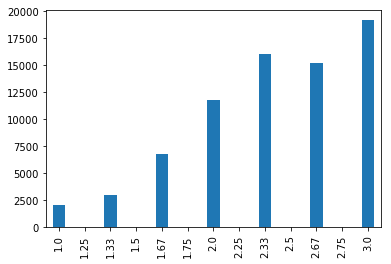

In [30]:
import matplotlib.pyplot as plt

relevance_sorted = train['relevance'].value_counts().sort_index()
relevance_sorted.plot(kind='bar')
plt.show()

It seems like the distribution of relevance scores trends to the higher end of the scale, so reviewers
are more likely to rank something as relevant.

In [31]:
# Import test file.
test = pd.read_csv('/Users/davidlichacz/home-depot/test.csv', encoding='latin-1')

In [32]:
# Explore test dataframe.
test.shape

(166693, 4)

In [33]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166693 entries, 0 to 166692
Data columns (total 4 columns):
id               166693 non-null int64
product_uid      166693 non-null int64
product_title    166693 non-null object
search_term      166693 non-null object
dtypes: int64(2), object(2)
memory usage: 5.1+ MB


In [34]:
test.head()

,id,product_uid,product_title,search_term
0,1,100001,Simpson Strong-Tie 12-Gauge Angle,90 degree bracket
1,4,100001,Simpson Strong-Tie 12-Gauge Angle,metal l brackets
2,5,100001,Simpson Strong-Tie 12-Gauge Angle,simpson sku able
3,6,100001,Simpson Strong-Tie 12-Gauge Angle,simpson strong ties
4,7,100001,Simpson Strong-Tie 12-Gauge Angle,simpson strong tie hcc668


In [35]:
# Naturally, the test set has the same structure as the training set, so the same methods can be performed.
pattern = re.compile('[0-9]{6}$')
id_check = test['product_uid'].astype(str).apply(pattern.match)
id_check.astype(bool).all()

True

In [36]:
test['product_uid'] = test['product_uid'].astype(str)

In [37]:
test.head()

,id,product_uid,product_title,search_term
0,1,100001,Simpson Strong-Tie 12-Gauge Angle,90 degree bracket
1,4,100001,Simpson Strong-Tie 12-Gauge Angle,metal l brackets
2,5,100001,Simpson Strong-Tie 12-Gauge Angle,simpson sku able
3,6,100001,Simpson Strong-Tie 12-Gauge Angle,simpson strong ties
4,7,100001,Simpson Strong-Tie 12-Gauge Angle,simpson strong tie hcc668


In [38]:
# The product_title column of test and train feel like they belong more with the descriptions data.
# This will also reduce duplication and the amount of data stored.
train_title = train[['product_uid', 'product_title']].drop_duplicates()
test_title = test[['product_uid', 'product_title']].drop_duplicates()
product_titles = pd.concat([train_title, test_title], axis=0).drop_duplicates().sort_values('product_uid')

In [39]:
# Add the product titles to the descriptions dataframe.
descriptions = pd.merge(descriptions, product_titles, on='product_uid', how='left')

In [40]:
descriptions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124603 entries, 0 to 124602
Data columns (total 3 columns):
product_uid            124603 non-null object
product_description    124603 non-null object
product_title          124603 non-null object
dtypes: object(3)
memory usage: 3.8+ MB


In [41]:
# This added a few rows to descriptions as there are a few products with some variation in the product title.
descriptions['product_uid'].value_counts().head(10)

182629    3
150455    2
108918    2
122733    2
163111    2
145621    2
156442    2
153137    2
148159    2
122715    2
Name: product_uid, dtype: int64

In [42]:
# Drop product titles from train and test sets.
train = train.drop('product_title', axis=1)
test = test.drop('product_title', axis=1)